In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 1) Load the dataset

In [44]:
df= pd.read_csv('titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2) Passenger id as index column

In [45]:
df_i= df.set_index('PassengerId')
df_i.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3) Basic details of the dataset

In [46]:
df.shape

(891, 12)

This dataset is a pandas dataframe with 12 columns and 891 rows

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [48]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 4) Fill in all the missing values present in all the columns in the dataset

In [49]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Replace null value in the column age with mean 

In [50]:
df['Age']= df['Age'].replace(np.NaN, df['Age'].mean())

In [51]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

we can replace embarked column missing values with thier mode

In [52]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace= True)

In [53]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

drop the column cabin since there are too much missing values

In [54]:
df.dropna(axis=1,inplace=True)

In [55]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# 5) Check and handle outliers in at least 3 columns in the dataset

In [56]:
df.describe()[['Age','Fare','SibSp']]

,Age,Fare,SibSp
count,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.523008
std,13.002015,49.693429,1.102743
min,0.420000,0.000000,0.000000
25%,22.000000,7.910400,0.000000
50%,29.699118,14.454200,0.000000
75%,35.000000,31.000000,1.000000
max,80.000000,512.329200,8.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1f24d8c2e80>,
 'caps': [<matplotlib.lines.Line2D at 0x1f24d8c22b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f24db94fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f24d5177f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f24d517760>],
 'means': []}

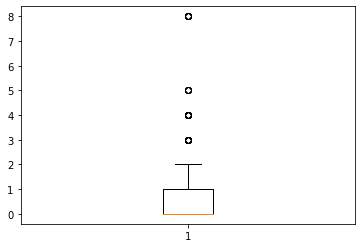

In [57]:
plt.boxplot(df['SibSp'])

Sibsp column have an outlier 

{'whiskers': [<matplotlib.lines.Line2D at 0x1f24dbfe1c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f24dbfe880>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f24dbe2df0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f24dbfef40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f24e1b4220>],
 'means': []}

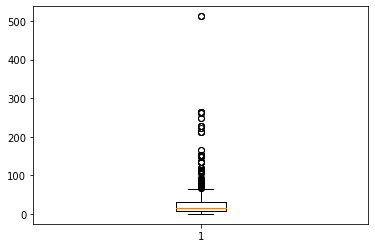

In [58]:
plt.boxplot(df['Fare'])

we have outliers in fare column too.

{'whiskers': [<matplotlib.lines.Line2D at 0x1f24e306f40>,
 'caps': [<matplotlib.lines.Line2D at 0x1f24e306040>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f24e306b50>],
 'medians': [<matplotlib.lines.Line2D at 0x1f24e31a640>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f24e31a9d0>],
 'means': []}

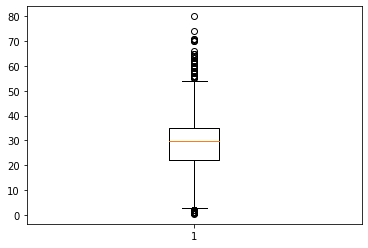

In [59]:
plt.boxplot(df['Age'])


 There is outliers in Age column also 
____________________________________

finding skewness to check for outliers
____________________________________

In [60]:
print('skewness value of Age: ',df['Age'].skew())
print('skewness value of Fare: ',df['Fare'].skew())

skewness value of Age:  0.4344880940129925
skewness value of Fare:  4.787316519674893


Dealing outliers at Fare column with flooring and capping 
__________________________________________________________

In [61]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
low_lim = Q1 -(1.5*IQR)
upp_lim = Q3 + (1.5*IQR)
df['Fare']=np.where(df['Fare']>upp_lim,upp_lim,np.where(df['Fare']<low_lim,low_lim,df['Fare']))

{'whiskers': [<matplotlib.lines.Line2D at 0x1f24e3bb040>,
 'caps': [<matplotlib.lines.Line2D at 0x1f24e3bb700>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f24e3a7b50>],
 'medians': [<matplotlib.lines.Line2D at 0x1f24e3bbdc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f24e3c1160>],
 'means': []}

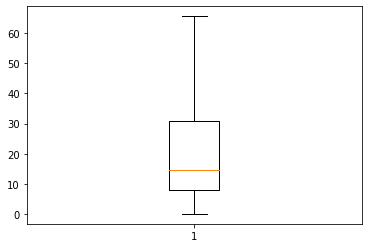

In [62]:
plt.boxplot(df['Fare'])

Removing Outliers From Age Column

In [63]:
Q1= np.percentile(df['Age'],25,interpolation='midpoint')
Q3= np.percentile(df['Age'],75, interpolation= 'midpoint')
Q1,Q3

(22.0, 35.0)

In [64]:
IQR= Q3-Q1
IQR

13.0

In [65]:
upper_bound= Q3+1.5*IQR
lower_bound= Q1-1.5*IQR
upper_bound, lower_bound

(54.5, 2.5)

In [66]:
new_df=df[(df['Age']<upper_bound) & (df['Age']>lower_bound)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1f24e22ca60>,
 'caps': [<matplotlib.lines.Line2D at 0x1f24e2346a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f24e22c700>],
 'medians': [<matplotlib.lines.Line2D at 0x1f24e234f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f24e234340>],
 'means': []}

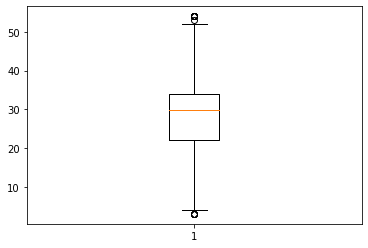

In [67]:
plt.boxplot(new_df['Age'])

In [68]:
sibsp= df['SibSp'].mode()
sibsp

0    0
dtype: int64

# 6) Do min max scaling on the feature set (Take ‘Survived’ as target)


In [77]:
reshape= df['Survived'].values.reshape(-1,1)

In [74]:
scaler= MinMaxScaler()

In [78]:
scaled= scaler.fit_transform(reshape)
scaled

array([[0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],

Data shriked within the limit range 1 and 0